<a href="https://colab.research.google.com/github/fridaruh/Curso_Data_Analysis_Risk_Mathics/blob/master/Income_Analysis_Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de librerías y datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fridaruh/pipeline_dt/master/in/income.csv')

In [3]:
df.sample(5)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_bi
30188,30188,64,Private,153894,Bachelors,13,Never-married,Sales,Unmarried,White,Female,0,0,40,Peru,<=50K,0
26877,26877,25,Private,139012,Bachelors,13,Never-married,Sales,Own-child,Asian-Pac-Islander,Male,2174,0,40,Vietnam,<=50K,0
5579,5579,44,Private,112517,Masters,14,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,20,United-States,>50K,1
16886,16886,63,Private,122442,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,0
20967,20967,19,Private,405526,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K,0


In [4]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'income_bi'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0','fnlwgt'], axis=1)

In [6]:
df.shape

(32560, 15)

# Exploración de datos

In [7]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [8]:
df['native-country'].value_counts()/len(df)

 United-States                 0.895854
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004208
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003256
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


In [9]:
df = df.drop(['native-country'], axis=1)

In [10]:
df['marital-status'].value_counts()/len(df)

 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name: marital-status, dtype: float64

In [11]:
len(df)

32560

In [12]:
df.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,income_bi
count,32560.000000,32560,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560.000000
unique,NaN,9,16,NaN,7,15,6,5,2,NaN,NaN,NaN,2,NaN
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,<=50K,NaN
freq,NaN,22696,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,24719,NaN
mean,38.581634,NaN,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,0.240817
std,13.640642,NaN,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,0.427586
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


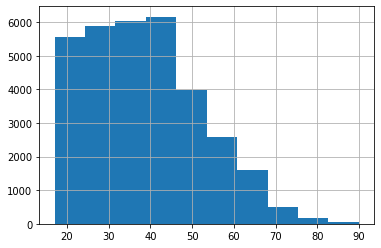

In [13]:
df['age'].hist()

In [14]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,income_bi
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K,0


In [15]:
import seaborn as sns

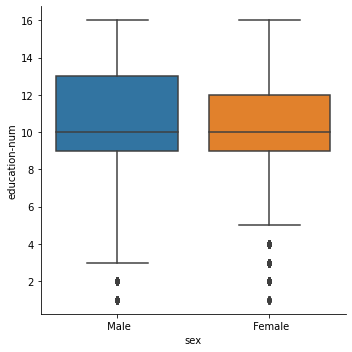

In [16]:
sns.catplot(x='sex', y='education-num', kind='box', data=df)

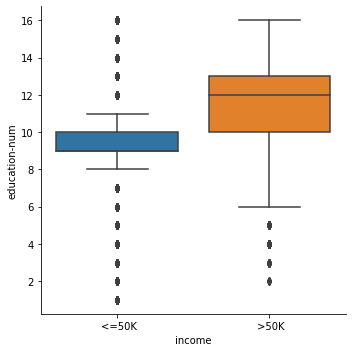

In [17]:
sns.catplot(x='income', y='education-num', kind='box', data=df)

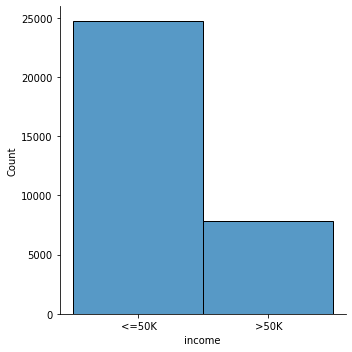

In [18]:
sns.displot(data=df, x='income')

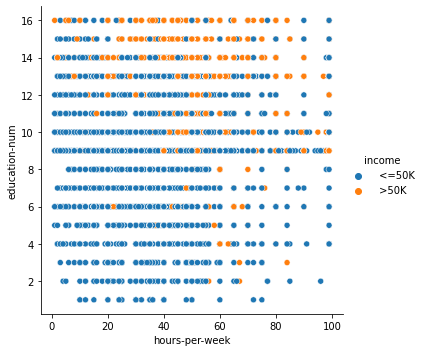

In [19]:
sns.relplot(x='hours-per-week', y='education-num', hue='income', data=df )

In [20]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,income_bi
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K,0


# Transformación

In [21]:
df_2 = pd.get_dummies(df, columns=['workclass','education','marital-status','occupation','relationship','race','sex'])

In [22]:
df.shape

(32560, 14)

In [23]:
df_2.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,income_bi,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,50,13,0,0,13,<=50K,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,38,9,0,0,40,<=50K,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,53,7,0,0,40,<=50K,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,28,13,0,0,40,<=50K,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,37,14,0,0,40,<=50K,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [24]:
df_2.shape

(32560, 67)

In [25]:
32650*67

2187550

Definimos nuestra variable a predecir Y

In [26]:
Y = df_2['income_bi']

In [27]:
Y.sample(5)

32179    0
11029    0
6613     1
14721    0
10455    0
Name: income_bi, dtype: int64

In [28]:
X = df_2.drop(['income','income_bi'], axis=1)

In [29]:
#X.columns

# Test, train split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=99 )

# Entrenamiento

In [53]:
import xgboost as xgb

Instanciamos el modelo

In [56]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.06, objective= 'binary:logistic', n_jobs=-1)

Entrenando el modelo con datos

In [57]:
model = xgb_model.fit(x_train, y_train)

Evaluación del set de entrenamiento y el set de prueba

In [58]:
model.score(x_train, y_train) #entrenamiento con 5 arboles

0.8726581695331695

In [59]:
model.score(x_test, y_test) #entrenamiento con 5 arboles

0.8625614250614251

# Métricas del modelo

**Curva ROC**

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
roc_auc_score(y_test, y_pred)

0.7304651080633988

In [45]:
roc_auc_score(y_test, y_pred_2)

0.7391155814759577

**Matriz de confusión**

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4926
           1       0.75      0.52      0.61      1586

    accuracy                           0.84      6512
   macro avg       0.81      0.73      0.76      6512
weighted avg       0.83      0.84      0.83      6512



In [48]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4926
           1       0.77      0.53      0.63      1586

    accuracy                           0.85      6512
   macro avg       0.82      0.74      0.77      6512
weighted avg       0.84      0.85      0.84      6512



# Gráfica del árbol de decisión

In [49]:
import matplotlib.pyplot as plt

In [50]:
cuadro_1 = x_test[x_test['marital-status_ Married-civ-spouse']<=0.5]

In [51]:
cuadro_1.sample(5)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
16597,18,7,0,0,20,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2279,21,10,0,0,20,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
21698,43,10,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
6946,37,9,0,0,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
30933,22,13,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


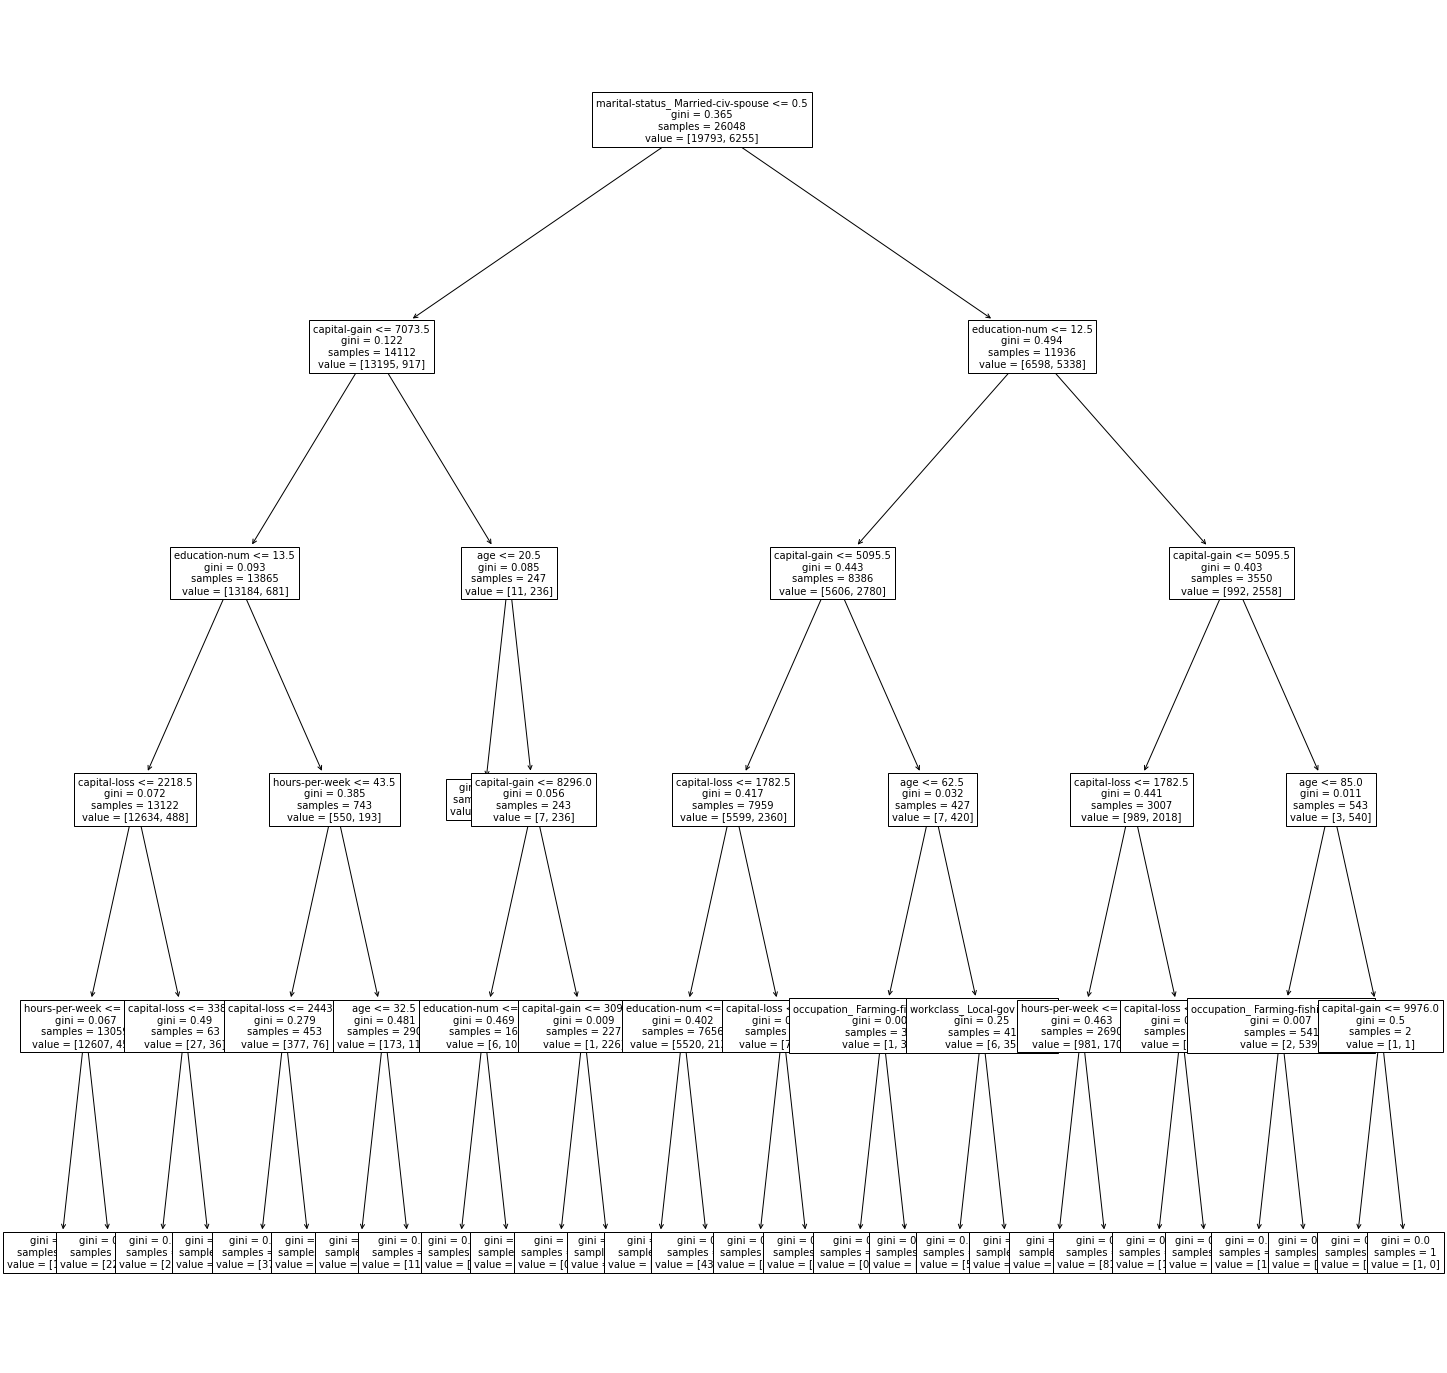

In [52]:
fig, ax = plt.subplots(figsize= (25,25))
tree.plot_tree(t_2, feature_names=X.columns, fontsize=10)
plt.show()